In [1]:
print('python')

python


In [2]:
!pip install kaggle


In [13]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vinayvvk527","key":"5b9e4f9fc8bd6d1f0b4e7fb7245d3433"}'}

In [14]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [15]:
!kaggle datasets download -d andrewmvd/pediatric-pneumonia-chest-xray

 99% 1.13G/1.14G [00:12<00:00, 146MB/s]
100% 1.14G/1.14G [00:12<00:00, 98.2MB/s]


In [16]:
from zipfile import ZipFile
filename='pediatric-pneumonia-chest-xray.zip'

with ZipFile(filename,'r') as zip:
  zip.extractall()
  print("Done")

Done


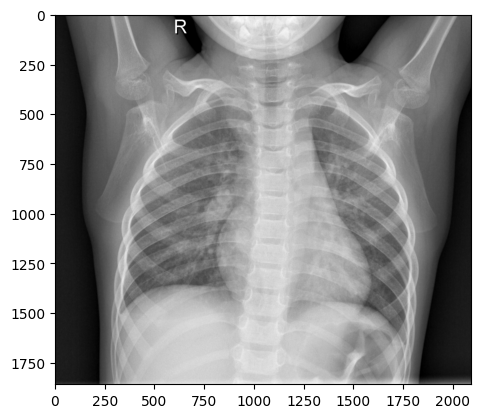

In [17]:
import cv2
import matplotlib.pyplot as plt
pic=cv2.imread('/content/Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0115-0001.jpeg',1)
plt.imshow(pic)
plt.show()

In [18]:
import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
print('Done')

Done


In [27]:
dir='/content/Pediatric Chest X-ray Pneumonia/train'
categ=['NORMAL','PNEUMONIA']

In [30]:
dataset=[]
for i in categ:
  path=os.path.join(dir,i)
  cla=categ.index(i)
  for img in os.listdir(path):
    try:
      img_arr=cv2.imread(os.path.join(path,img),1)
      con_img=cv2.resize(img_arr,(100,100))
      dataset.append([con_img,cla])
    except:pass

In [31]:
len(dataset)

5232

In [32]:
import random
random.shuffle(dataset)

In [33]:
for i in dataset[:10]:
  print(i[1])

1
0
1
1
1
1
0
1
0
1


In [34]:
x=[]
y=[]
for img,cl in dataset:
  x.append(img)
  y.append(cl)

In [35]:
x=np.array(x).reshape(-1,100,100,3)
y=np.array(y)

In [36]:
print(x.shape)
print(y.shape)

(5232, 100, 100, 3)
(5232,)


In [37]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,input_shape=(100,100,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation=tf.nn.relu))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation=tf.nn.relu))
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))


In [39]:
model.compile(optimizer='Adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 67712)             0         
                                                                 
 dense (Dense)               (None, 64)                4

In [41]:
model.fit(x,y,epochs=10)

Epoch 1/10
164/164 [==============================] - 248s 2s/step - loss: 0.4392 - accuracy: 0.8091
Epoch 2/10
164/164 [==============================] - 240s 1s/step - loss: 0.2571 - accuracy: 0.8968
Epoch 3/10
164/164 [==============================] - 271s 2s/step - loss: 0.2021 - accuracy: 0.9199
Epoch 4/10
164/164 [==============================] - 201s 1s/step - loss: 0.1823 - accuracy: 0.9258
Epoch 5/10
164/164 [==============================] - 199s 1s/step - loss: 0.1577 - accuracy: 0.9383
Epoch 6/10
164/164 [==============================] - 199s 1s/step - loss: 0.1415 - accuracy: 0.9465
Epoch 7/10
164/164 [==============================] - 196s 1s/step - loss: 0.1253 - accuracy: 0.9516
Epoch 8/10
164/164 [==============================] - 194s 1s/step - loss: 0.1273 - accuracy: 0.9499
Epoch 9/10
164/164 [==============================] - 193s 1s/step - loss: 0.1166 - accuracy: 0.9543
Epoch 10/10
164/164 [==============================] - 194s 1s/step - loss: 0.1122 - accura

In [42]:
testdir='/content/Pediatric Chest X-ray Pneumonia/test'
cat=['NORMAL','PNEUMONIA']

In [48]:
testdata=[]
for c in cat:
  path=os.path.join(testdir,c)
  idx=categ.index(c)
  for img in os.listdir(path):
    try:
      img_arr=cv2.imread(os.path.join(path,img),1)
      new_arr=cv2.resize(img_arr,(100,100))
      testdata.append([new_arr,idx])
    except:pass

In [49]:
x_test=[]
y_test=[]

In [50]:
for img,cl in testdata:
  x_test.append(img)
  y_test.append(cl)

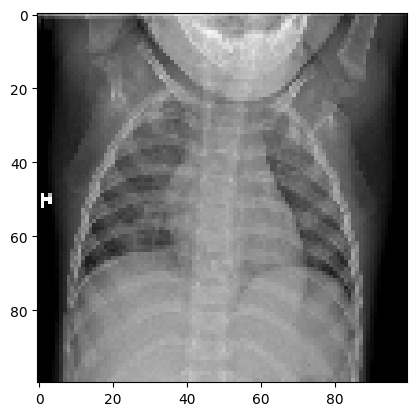

In [51]:
plt.imshow(x_test[0])
plt.show()

In [52]:
x_t=np.array(x_test).reshape(-1,100,100,3)
y_t=np.array(y_test)

In [54]:
x_t.shape

(5232, 100, 100, 3)

In [55]:
model.evaluate(x_t,y_t)

164/164 [==============================] - 56s 340ms/step - loss: 0.1008 - accuracy: 0.9595


[0.1007675975561142, 0.9594801068305969]

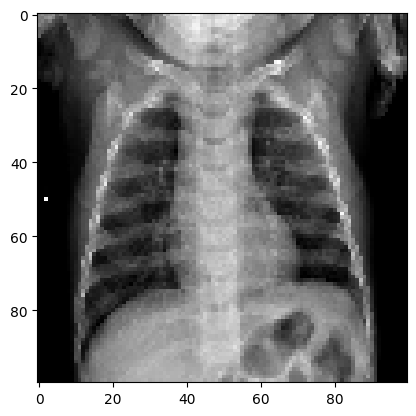

0
164/164 [==============================] - 56s 342ms/step
[0.00870267]
No RISK


In [58]:
c=[x_t,y_t]

po=340

img=c[0][po]
lb1=c[1][po]
plt.imshow(img)
plt.show()
print(lb1)

img=img.reshape(100,100,3)
pre=model.predict(x_t)
print(pre[po])
if (pre[po]>0.5):
  print('Covid Affected')

else:print('No RISK')